<h2> Segmenting and Grouping Neighborhood Vulnerable to Ebola Virus Diseases</h2>

<h2> By Michael Kumakech</h2>

<h2> Solutions to Part 1</h2>

<b> Import libaries</b>

In [1]:
import requests
import lxml.html as lh
import pandas as pd

<b> Remove the Website to put the table in Notebook</b>

In [2]:
WHO_url = 'https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease' #assign the wiki page

page = requests.get(WHO_url) # create a handle to for contents of the wiki page

doc = lh.fromstring(page.content) # store content of the wiki page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 rows

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

<b> Check the table Headers</b>

In [3]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Year
2:Country
3:EVD
4:Cases
5:Deaths
6:Case fatality


<b> Check the data in the other row</b>

In [4]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=6: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

<b> What about the numbers of rows and columns</b>

In [5]:
[len(C) for (title,C) in col]

[38, 38, 38, 38, 38, 38]

<b> Displays the data frame with three columns </b>

In [6]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [7]:
df.head(12)

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2018-2019,Democratic Republic of the Congo,Zaire,ongoing,,
1,2018,Democratic Republic of the Congo,Zaire,54,33,61%
2,2017,Democratic Republic of the Congo,Zaire,8,4,50%
3,2015,Italy,Zaire,1,0,0%
4,2014,Spain,Zaire,1,0,0%
5,2014,UK,Zaire,1,0,0%
6,2014,USA,Zaire,4,1,25%
7,2014,Senegal,Zaire,1,0,0%
8,2014,Mali,Zaire,8,6,75%
9,2014,Nigeria,Zaire,20,8,40%


<b>Checking the shapes</b>

In [8]:
df.shape

(38, 6)

<b> Check the EVD</b>

In [9]:
df = df.replace('\n','', regex=True) #this is to remove \n
df.rename(columns = {'Year':'Year', 'EVD\n':'EVD'}, inplace = True) # rename the column Year to Year and remove \n in EVD

In [10]:
df.head(39)

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2018-2019,Democratic Republic of the Congo,Zaire,ongoing,,
1,2018,Democratic Republic of the Congo,Zaire,54,33,61%
2,2017,Democratic Republic of the Congo,Zaire,8,4,50%
3,2015,Italy,Zaire,1,0,0%
4,2014,Spain,Zaire,1,0,0%
5,2014,UK,Zaire,1,0,0%
6,2014,USA,Zaire,4,1,25%
7,2014,Senegal,Zaire,1,0,0%
8,2014,Mali,Zaire,8,6,75%
9,2014,Nigeria,Zaire,20,8,40%


<h2> Clean the dataframe</h2>

In [10]:
import pandas as pd
import numpy as np

<b> Replace the string value for Cases and Death with Numeric values</b>

In [11]:
cleandf=df.replace(['14124*','10675*','3811*','3956*','4809*','2543*'],[14124,10675,3811,3956,4809,2543,])
cleandf.head(39)

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2018-2019,Democratic Republic of the Congo,Zaire,ongoing,,
1,2018,Democratic Republic of the Congo,Zaire,54,33,61%
2,2017,Democratic Republic of the Congo,Zaire,8,4,50%
3,2015,Italy,Zaire,1,0,0%
4,2014,Spain,Zaire,1,0,0%
5,2014,UK,Zaire,1,0,0%
6,2014,USA,Zaire,4,1,25%
7,2014,Senegal,Zaire,1,0,0%
8,2014,Mali,Zaire,8,6,75%
9,2014,Nigeria,Zaire,20,8,40%


<b> Remove Rows 0 and 13 with incomplete Records</b>

In [12]:

# Delete row at index position 0 & 13
df2 = cleandf.drop([cleandf.index[0] , cleandf.index[13]])


In [13]:
df2.head(38)

,Year,Country,EVD,Cases,Deaths,Case fatality
1,2018,Democratic Republic of the Congo,Zaire,54,33,61%
2,2017,Democratic Republic of the Congo,Zaire,8,4,50%
3,2015,Italy,Zaire,1,0,0%
4,2014,Spain,Zaire,1,0,0%
5,2014,UK,Zaire,1,0,0%
6,2014,USA,Zaire,4,1,25%
7,2014,Senegal,Zaire,1,0,0%
8,2014,Mali,Zaire,8,6,75%
9,2014,Nigeria,Zaire,20,8,40%
10,2014-2016,Sierra Leone,Zaire,14124,3956,28%


<h2> Data Analysis</h2>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline


<h2> Explore the Data</h2>

In [15]:
df2.describe()

,Year,Country,EVD,Cases,Deaths,Case fatality
count,36,36,36,36,36,36
unique,23,19,5,29,28,24
top,2014,Democratic Republic of Congo,Zaire,1,0,0%
freq,6,6,24,8,5,5


<b>we can see we have missing values for the columns. </b>

In [16]:
print("number of NaN values for the column Country :", df2['Country'].isnull().sum())
print("number of NaN values for the column EVD :", df2['EVD'].isnull().sum())
print("number of NaN values for the column Cases :", df2['Cases'].isnull().sum())
print("number of NaN values for the column Deaths :", df2['Deaths'].isnull().sum())


number of NaN values for the column Country : 0
number of NaN values for the column EVD : 0
number of NaN values for the column Cases : 0
number of NaN values for the column Deaths : 0


<h2> Exploratory data analysis</h2>

Use the method value_counts to count the number of Ebola  with unique EVD values, use the method .to_frame() to convert it to a dataframe

In [17]:
df2['EVD'].value_counts().to_frame()

,EVD
Zaire,24
Sudan,7
Zaire,2
Bundibugyo,2
Taï Forest,1


<b> Install packages</b>

In [37]:
!conda install -c anaconda xlrd --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlrd-1.2.0                 |             py_0         108 KB  anaconda

The following packages will be UPDATED:

    xlrd: 1.2.0-py_0 --> 1.2.0-py_0 anaconda


xlrd-1.2.0           | 108 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


<h2> Model Development</h2>

In [18]:
#Import libraries 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
%matplotlib inline

<b> We can Fit a linear regression model using the Cases feature  and caculate the R^2 for Deaths</b>

In [19]:
X = df2[['Cases']] 
Y = df2['Deaths'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y) 

0.9132752924114821

<b> How could identified cases help us predict deaths? </b>

In [20]:
X = df2[['Cases']] 
Y = df2['Deaths'] 
lm = LinearRegression()
lm
lm.fit(X,Y)

Yhat=lm.predict(X)
Yhat[0:5]

array([74.9239522 , 58.74522986, 56.28325037, 56.28325037, 56.28325037])

<b> What is the value of the intercept ? </b>

In [21]:
lm.intercept_

55.931539013683846

<b> What is the value of the Slope ? </b>

In [22]:
lm.coef_

array([0.35171136])

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


<h2>What is the final estimated linear model we get? </h2>

As we saw above, we should get a final linear model with the structure:
<b> $$ Yhat = a + b X $$</b>

Plugging in the actual values we get:

<b>Deaths = 56 + 0.35 x cases</b>


In [24]:
StandardScaler()
PolynomialFeatures(include_bias=False)
LinearRegression()
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


<h2>Let’s see how many of each EVD is in our data set</h2>

In [25]:
df2['EVD'].value_counts()

Zaire         24
Sudan          7
Zaire          2
Bundibugyo     2
Taï Forest     1
Name: EVD, dtype: int64

<b>  27 Zaire EVDs cases reported in these countries compared to 7 for Sudan, 2 for Bundibugyo and 1 for Tai Forest. </b>

<b> Lets plot some columns to underestand data better:</b>

In [26]:

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda pydotplus -y
!conda install -c anaconda python-graphviz -y
!conda install -c anaconda seaborn -y



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |             py_1          23 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-py_1        anaconda

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0               --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0          --> 2019.11.28-py36_

In [27]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline




<h2>Feature before One Hot Encoding </h2>

In [28]:
df2.shape

(36, 6)

In [29]:
df2[['EVD','Cases','Deaths','Case fatality']].head()

,EVD,Cases,Deaths,Case fatality
1,Zaire,54,33,61%
2,Zaire,8,4,50%
3,Zaire,1,0,0%
4,Zaire,1,0,0%
5,Zaire,1,0,0%


<b>Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame</b>

In [30]:
Feature = df2[['Cases','Deaths']]
Feature = pd.concat([Feature,pd.get_dummies(df['EVD'])], axis=1)

Feature.drop(['Taï Forest'], axis = 1,inplace=True)
Feature.head(36)
 


,Cases,Deaths,Bundibugyo,Sudan,Zaire,Zaire,
0,NaN,NaN,0,0,0,1,0
1,54,33,0,0,0,1,0
2,8,4,0,0,0,1,0
3,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0
5,1,0,0,0,1,0,0
6,4,1,0,0,1,0,0
7,1,0,0,0,1,0,0
8,8,6,0,0,1,0,0
9,20,8,0,0,1,0,0


In [31]:
# Delete row at index position 0 & 13
df3 = Feature.drop([Feature.index[0] , Feature.index[13]])
df3

,Cases,Deaths,Bundibugyo,Sudan,Zaire,Zaire,
1,54,33,0,0,0,1,0
2,8,4,0,0,0,1,0
3,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0
5,1,0,0,0,1,0,0
6,4,1,0,0,1,0,0
7,1,0,0,0,1,0,0
8,8,6,0,0,1,0,0
9,20,8,0,0,1,0,0
10,14124,3956,0,0,1,0,0


<h2> Feature selection</h2>

<b> Lets defind feature sets, X:</b>

In [32]:
X = df3
X[0:5]


,Cases,Deaths,Bundibugyo,Sudan,Zaire,Zaire,
1,54,33,0,0,0,1,0
2,8,4,0,0,0,1,0
3,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0
5,1,0,0,0,1,0,0


<b>What are our lables?</b>

In [33]:
y = df2['EVD'].values
y[0:5]


array(['Zaire\xa0', 'Zaire\xa0', 'Zaire', 'Zaire', 'Zaire'], dtype=object)

In [34]:
y_collection = df2['EVD'].replace(to_replace=['Zaire', 'Sudan','Bundibugyo'], value=[2,1,0]).values
y_collection[0:5]


array(['Zaire\xa0', 'Zaire\xa0', 2, 2, 2], dtype=object)

<h2> Normalize Data</h2>

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [36]:
X_initial = X
scaler = preprocessing.StandardScaler().fit(X_initial)
X= scaler.transform(X)
X[0:10]


array([[-0.27971026, -0.30665538, -0.24253563, -0.49130368, -1.41421356,
         4.12310563,  0.        ],
       [-0.29559995, -0.33387424, -0.24253563, -0.49130368, -1.41421356,
         4.12310563,  0.        ],
       [-0.29801794, -0.33762856, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ],
       [-0.29801794, -0.33762856, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ],
       [-0.29801794, -0.33762856, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ],
       [-0.29698166, -0.33668998, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ],
       [-0.29801794, -0.33762856, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ],
       [-0.29559995, -0.33199707, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ],
       [-0.29145481, -0.33011991, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ],
       [ 4.58046067,  3.3753

<h2>Classification  with 75% Training dataset and 25% Testing dataset</h2> The following algorithms were used K Nearest Neighbor(KNN), Decision Tree, Support Vector Machine and Logistic Regression.

<h2> K Nearest Neighbor(KNN)</h2>

Split the initial train set in train and cross validation set. Use 75% of the data set for training and 25% for cross validation.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Cross validation set:', X_cv.shape,  y_cv.shape)


Train set: (27, 7) (27,)
Cross validation set: (9, 7) (9,)



<b>Import library</b>

In [39]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report



In [40]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

<b>Find the best k by training and predicting</b>

Train the model for various k between 1 and 9 and choose the one with the best accuracy on the cross validation set.

In [41]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
#Predict on the Cross Validation set
    yhat_cv=neigh.predict(X_cv)
    #Calculate 
    mean_acc[n-1] = metrics.accuracy_score(y_cv, yhat_cv)

    
    std_acc[n-1]=np.std(yhat_cv==y_cv)/np.sqrt(yhat_cv.shape[0])

mean_acc


array([1.        , 1.        , 1.        , 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889])

<b>Display the accuracy of the model for the various K </b>

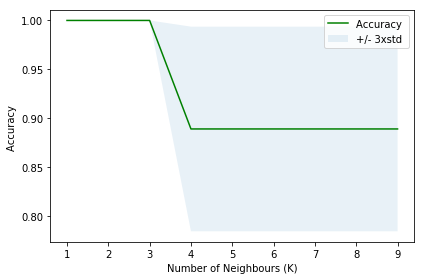

The best accuracy was 1.0 with k= 1


In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


Now generate and store the model on the global train set for the optimal k = 5.

In [43]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X, y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

<h2>KNN Evaluation</h2>

<b>Jaccard index for accuracy evaluation.</b>

In [44]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score( y_cv,  yhat_cv)

0.8888888888888888

In [45]:

dfr = {'Jaccard': [0, 0, 0, 0], 'F1-score': [0, 0, 0, 0], 'LogLoss': ['NA', 'NA', 'NA', 0]}
df_report = pd.DataFrame (data=dfr, index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
df_report


,Jaccard,F1-score,LogLoss
KNN,0,0,NA
Decision Tree,0,0,NA
SVM,0,0,NA
LogisticRegression,0,0,0


<b>Calculate accuracy and F1 for KNN algorithm</b>

In [47]:
#yhat_test=neigh.predict(X_test)
kn_jacc_test=metrics.jaccard_similarity_score(y_cv,  yhat_cv)
kn_f1_test=metrics.f1_score(y_cv,  yhat_cv, average ='macro')
kn_cnf_matrix = confusion_matrix(y_cv,  yhat_cv)
print("Accuracy is ", kn_jacc_test, " F1 is" , kn_f1_test)
print(classification_report(y_cv,  yhat_cv))
kn_cnf_matrix


Accuracy is  0.8888888888888888  F1 is 0.6363636363636364
              precision    recall  f1-score   support

  Bundibugyo       0.00      0.00      0.00         1
       Sudan       1.00      1.00      1.00         3
       Zaire       0.83      1.00      0.91         5

   micro avg       0.89      0.89      0.89         9
   macro avg       0.61      0.67      0.64         9
weighted avg       0.80      0.89      0.84         9



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

array([[0, 0, 1],
       [0, 3, 0],
       [0, 0, 5]])

In [48]:
df_report.loc['KNN','Jaccard'] = kn_jacc_test
df_report.loc['KNN','F1-score'] = kn_f1_test


<h2>Decision Tree</h2>

<b>Import necessary libraries</b>

In [49]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


<b>Build an empty DecisionTree object with depth 5</b>

In [50]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
LoanTree # it shows the default parameters


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-0.27971026, -0.30665538, -0.24253563, -0.49130368, -1.41421356,
         4.12310563,  0.        ],
       [-0.29559995, -0.33387424, -0.24253563, -0.49130368, -1.41421356,
         4.12310563,  0.        ],
       [-0.29801794, -0.33762856, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ],
       [-0.29801794, -0.33762856, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ],
       [-0.29801794, -0.33762856, -0.24253563, -0.49130368,  0.70710678,
        -0.24253563,  0.        ]])

<b>Train the decision tree using the global X data set.</b>

In [52]:
LoanTree.fit(X_initial, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b>Print the Decision Tree</b>

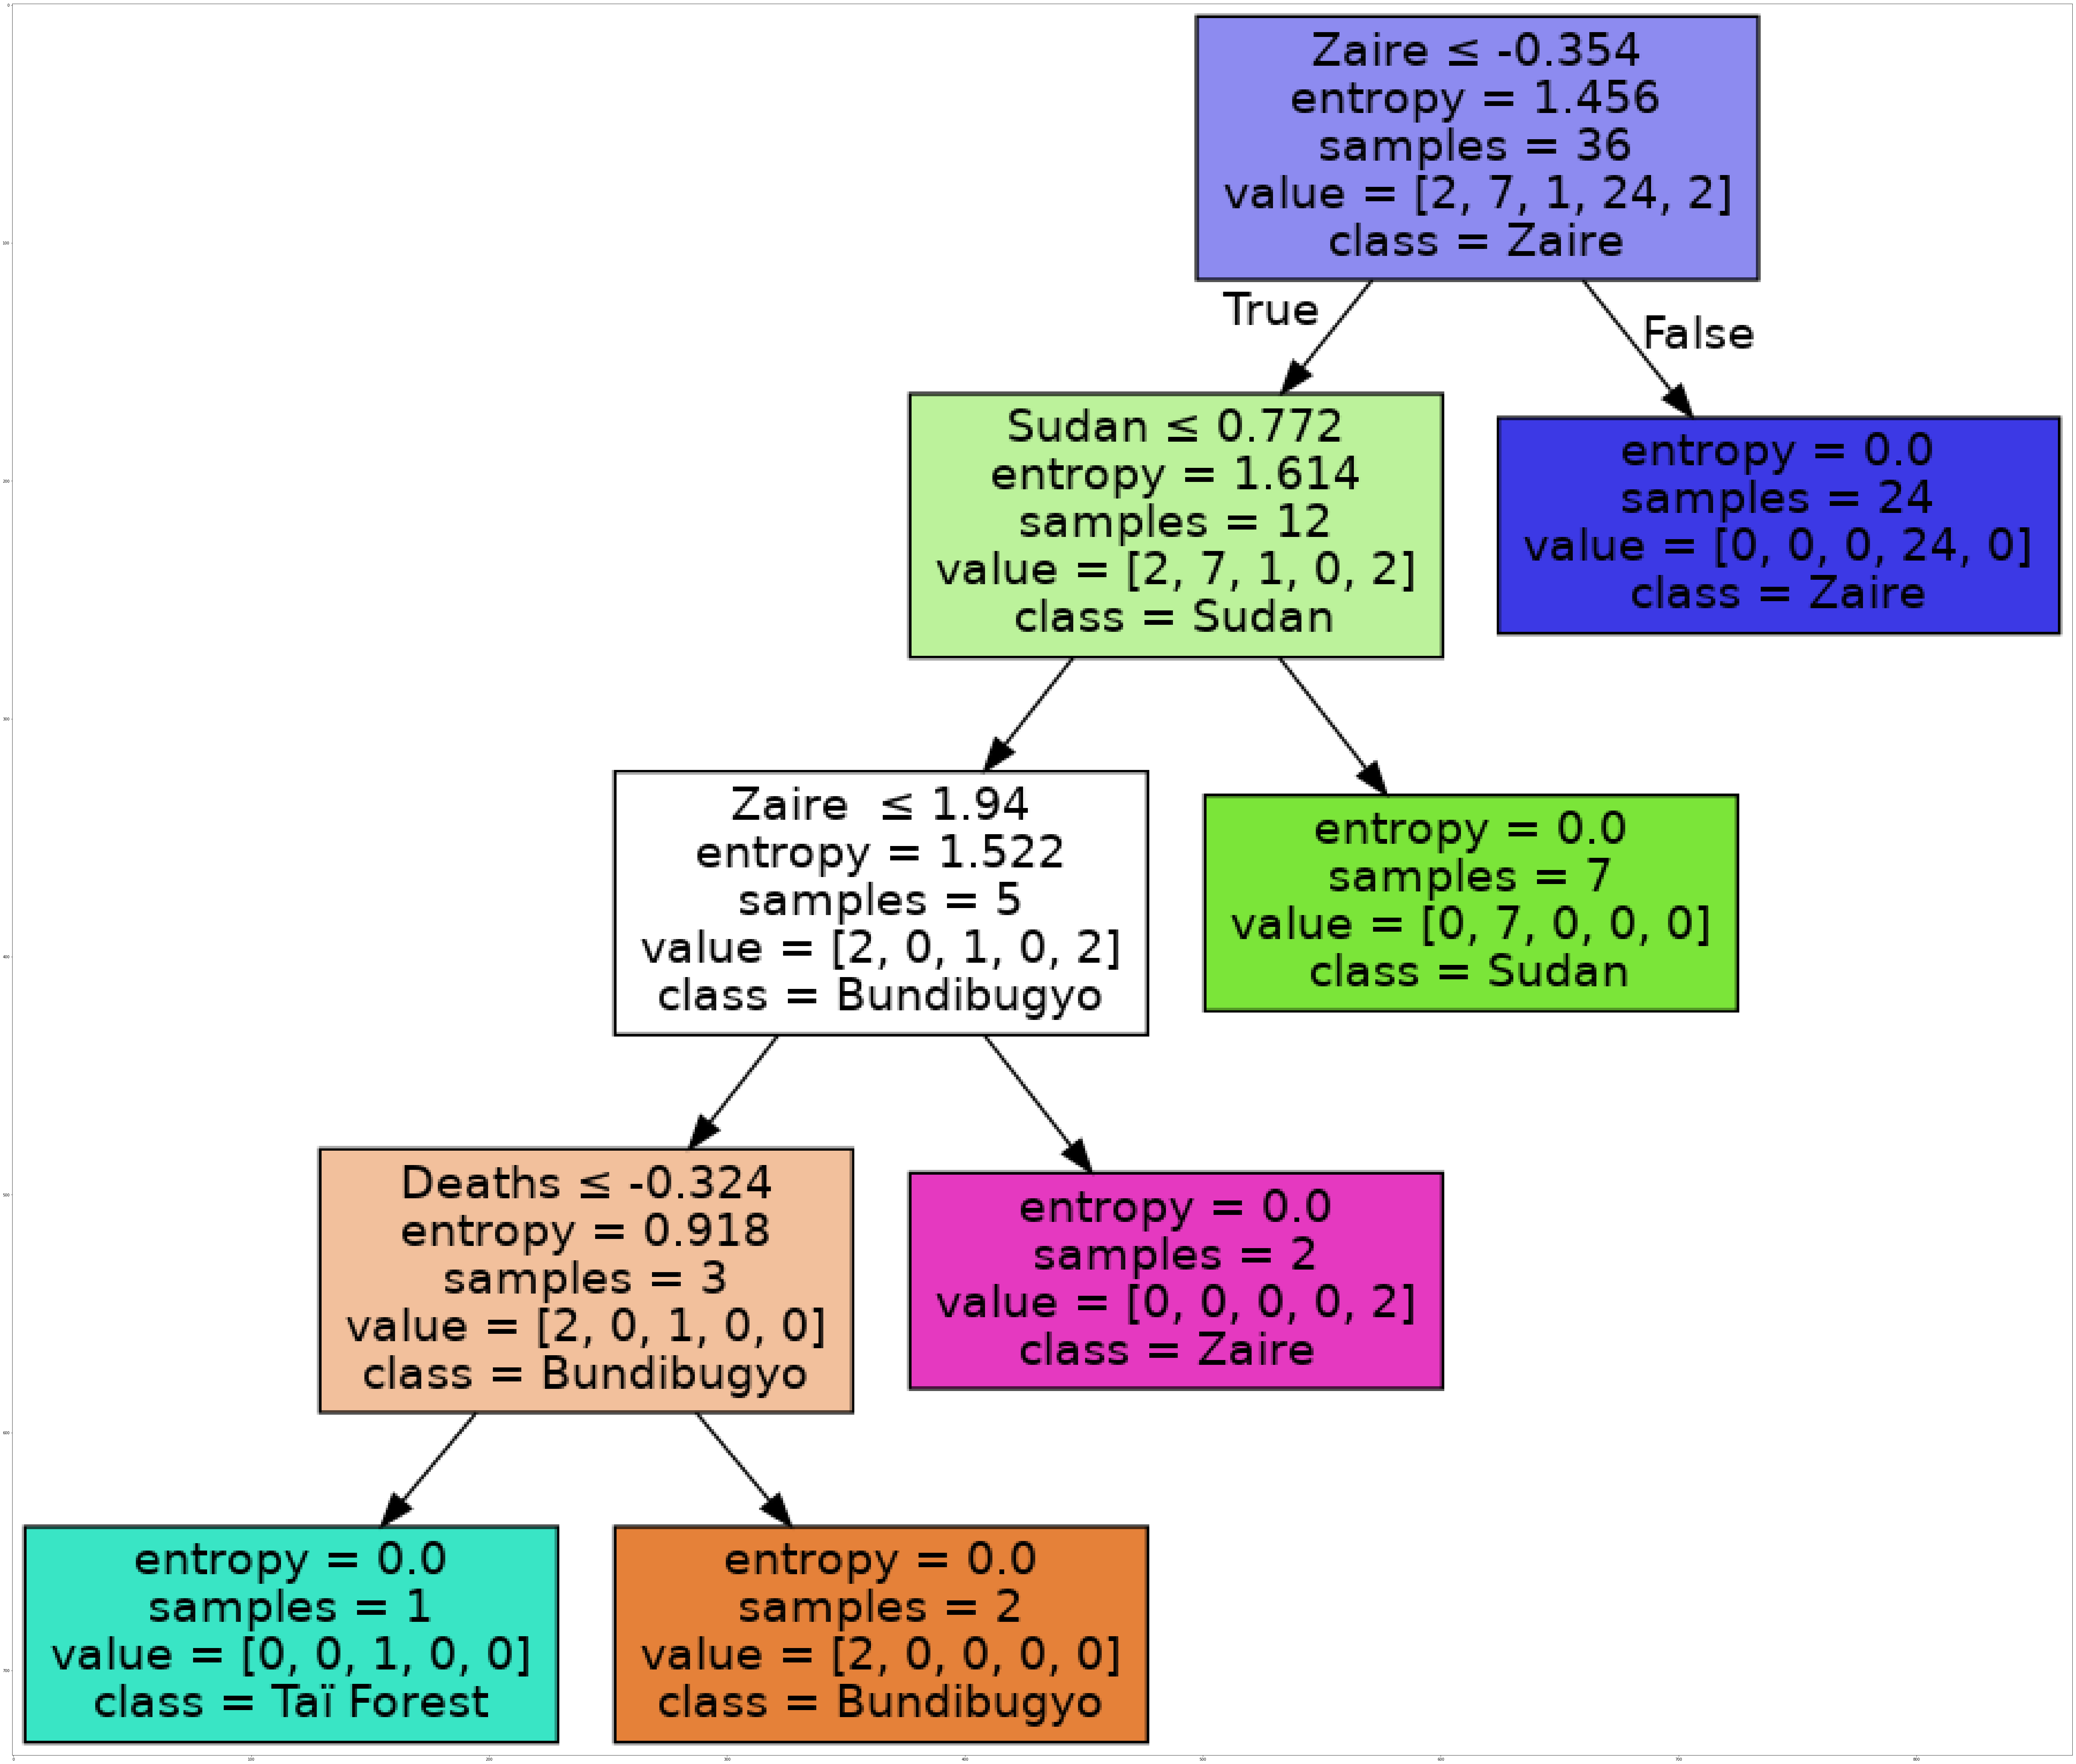

In [53]:
dot_data = StringIO()
filename = "EVDtree.png"
featureNames = Feature.columns
targetNames = df['EVD'].tolist()
out=tree.export_graphviz(LoanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


In [54]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')

<h2> Evaluating the Accuracy of Decison Tree Alforithm</h2>

<b>Use Decision Tree object previously trained. </b>

In [55]:
yhat_tree=LoanTree.predict(X_initial)
tree_jacc_test=metrics.jaccard_similarity_score(y, yhat_tree)
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix


Accuracy is  1.0  F1 is 1.0
              precision    recall  f1-score   support

  Bundibugyo       1.00      1.00      1.00         2
       Sudan       1.00      1.00      1.00         7
  Taï Forest       1.00      1.00      1.00         1
       Zaire       1.00      1.00      1.00        24
      Zaire        1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



array([[ 2,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  2]])

In [56]:
df_report.loc['Decision Tree','Jaccard'] = tree_jacc_test
df_report.loc['Decision Tree','F1-score'] = tree_f1_test


<h2>Support Vector Machine</h2>

In [57]:
from sklearn import svm
EVDSVM = svm.SVC(kernel='rbf')
EVDSVM.fit(X, y) 


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

<h2>Calculate accuracy and F1 for Support Vector Machine</h2>

<b>Use SVM object previously trained</b>

In [58]:
yhat_svm=EVDSVM.predict(X)
svm_jacc_test=metrics.jaccard_similarity_score(y, yhat_svm)
svm_f1_test=metrics.f1_score(y, yhat_svm, average ='macro')
svm_cnf_matrix = confusion_matrix(y, yhat_svm)
print("Accuracy is ", svm_jacc_test, " F1 is" , svm_f1_test)
print(classification_report(y, yhat_svm))
svm_cnf_matrix


Accuracy is  0.9722222222222222  F1 is 0.7959183673469388
              precision    recall  f1-score   support

  Bundibugyo       1.00      1.00      1.00         2
       Sudan       1.00      1.00      1.00         7
  Taï Forest       0.00      0.00      0.00         1
       Zaire       0.96      1.00      0.98        24
      Zaire        1.00      1.00      1.00         2

   micro avg       0.97      0.97      0.97        36
   macro avg       0.79      0.80      0.80        36
weighted avg       0.95      0.97      0.96        36



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

array([[ 2,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  2]])

In [59]:
df_report.loc['SVM','Jaccard'] = svm_jacc_test
df_report.loc['SVM','F1-score'] = svm_f1_test


<h2> Logistic Regression</h2>

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1.0, solver='liblinear').fit(X,y)
LR


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
yhat_LR = LR.predict(X)

<h2> Calculate accuracy, F1 and log_loss for Logistic Regression.</h2>

In [62]:
yhat_proba_LR = LR.predict_proba(X)
yhat_LR=LR.predict(X)
LR_jacc_test=metrics.jaccard_similarity_score(y, yhat_LR)
LR_f1_test=metrics.f1_score(y, yhat_LR, average ='macro')
LR_cnf_matrix = confusion_matrix(y, yhat_LR)
LR_log_loss=metrics.log_loss(y, yhat_proba_LR)
print("Accuracy is ", LR_jacc_test, " F1 is" , LR_f1_test, " log_loss is", LR_log_loss)
print(classification_report(y, yhat_LR))
LR_cnf_matrix



Accuracy is  1.0  F1 is 1.0  log_loss is 0.2816651160161683
              precision    recall  f1-score   support

  Bundibugyo       1.00      1.00      1.00         2
       Sudan       1.00      1.00      1.00         7
  Taï Forest       1.00      1.00      1.00         1
       Zaire       1.00      1.00      1.00        24
      Zaire        1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



array([[ 2,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  2]])

In [63]:
df_report.loc['LogisticRegression','Jaccard'] = LR_jacc_test
df_report.loc['LogisticRegression','F1-score'] = LR_f1_test
df_report.loc['LogisticRegression','LogLoss'] = LR_log_loss


<h2> Report</h2>

In [64]:
df_report 

,Jaccard,F1-score,LogLoss
KNN,0.888889,0.636364,NA
Decision Tree,1.000000,1.000000,NA
SVM,0.972222,0.795918,NA
LogisticRegression,1.000000,1.000000,0.281665


<h2>Classification with 80% Training dataset and 20% Test dataset</h2>

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model. The following algorithms are to be used:
•	K Nearest Neighbor(KNN)
•	Decision Tree
•	Support Vector Machine
•	Logistic Regression


<h2> K Nearest Neighbor(KNN)</h2>

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)




Train set: (28, 7) (28,)
Test set: (8, 7) (8,)


Test set accuracy with k = 1 is 1.0
Test set accuracy with k = 2 is 1.0
Test set accuracy with k = 3 is 1.0
Test set accuracy with k = 4 is 0.88
Test set accuracy with k = 5 is 0.88
Test set accuracy with k = 6 is 0.88
Test set accuracy with k = 7 is 0.88
Test set accuracy with k = 8 is 0.88
Test set accuracy with k = 9 is 0.88
Test set accuracy with k = 10 is 0.5
Test set accuracy with k = 11 is 0.5
Test set accuracy with k = 12 is 0.5
Test set accuracy with k = 13 is 0.5
Test set accuracy with k = 14 is 0.5

Highest accuracy is achieved with k = 1


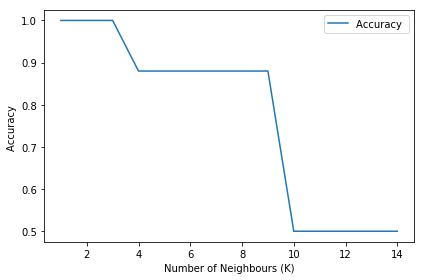

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

ks = range(1,15)
accs = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

    yhat = knn.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, yhat),2)
    accs.append(acc)
    print("Test set accuracy with k =", k, "is", acc)
sns.lineplot(ks, accs)

bestk = ks[accs.index(max(accs))]
print("\nHighest accuracy is achieved with k =", bestk)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
knn = KNeighborsClassifier(n_neighbors = bestk).fit(X_train, y_train)



<h2>Decision Tree</h2>


Test set accuracy with depth = 5 is 1.0
Test set accuracy with depth = 6 is 1.0
Test set accuracy with depth = 7 is 1.0
Test set accuracy with depth = 8 is 1.0
Test set accuracy with depth = 9 is 1.0
Test set accuracy with depth = 10 is 1.0
Test set accuracy with depth = 11 is 1.0
Test set accuracy with depth = 12 is 1.0
Test set accuracy with depth = 13 is 1.0
Test set accuracy with depth = 14 is 1.0
Test set accuracy with depth = 15 is 1.0

Highest accuracy is achieved with depth = 5


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

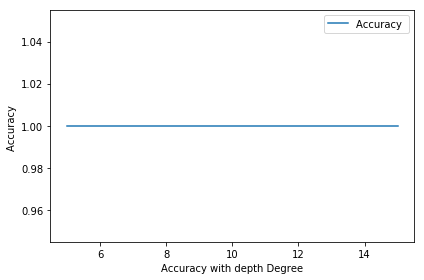

In [67]:
from sklearn.tree import DecisionTreeClassifier
ds = range(5,16)
accs = []
for d in ds:
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    dtree.fit(X_train, y_train)
    yhat = dtree.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, yhat), 2)
    accs.append(acc)
    print("Test set accuracy with depth =", d, "is", acc)
sns.lineplot(ds, accs)

bestd = ds[accs.index(max(accs))]
print("\nHighest accuracy is achieved with depth =", bestd)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Accuracy with depth Degree')
plt.tight_layout()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = bestd)
dtree.fit(X_train, y_train)


<h2> Support Vector Machine</h2>

Test set accuracy with degree = 1 is 1.0
Test set accuracy with degree = 2 is 1.0
Test set accuracy with degree = 3 is 1.0
Test set accuracy with degree = 4 is 1.0
Test set accuracy with degree = 5 is 1.0
Test set accuracy with degree = 6 is 1.0
Test set accuracy with degree = 7 is 1.0
Test set accuracy with degree = 8 is 1.0
Test set accuracy with degree = 9 is 1.0
Test set accuracy with degree = 10 is 1.0
Test set accuracy with degree = 11 is 1.0
Test set accuracy with degree = 12 is 1.0
Test set accuracy with degree = 13 is 1.0
Test set accuracy with degree = 14 is 1.0
Test set accuracy with degree = 15 is 0.88

Highest accuracy is achieved with degree = 1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packa

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

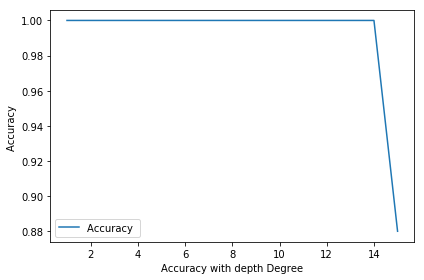

In [68]:
from sklearn import svm
degs = range(1,16)
accs = []
for deg in degs:
    svm_clf = svm.SVC(kernel='poly', degree=deg)
    svm_clf.fit(X_train, y_train)
    yhat = svm_clf.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, yhat), 2)
    accs.append(acc)
    print("Test set accuracy with degree =", deg, "is", acc)
sns.lineplot(degs, accs)

bestdeg = degs[accs.index(max(accs))]
print("\nHighest accuracy is achieved with degree =", bestdeg)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Accuracy with depth Degree')
plt.tight_layout()
svm_clf = svm.SVC(kernel='poly', degree=bestdeg)
svm_clf.fit(X_train, y_train)


<h2> Logistic Regression<h2>

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarni

Test set accuracy with c = 0.01 is 1.0
Test set accuracy with c = 0.02 is 1.0
Test set accuracy with c = 0.05 is 1.0
Test set accuracy with c = 0.75 is 1.0
Test set accuracy with c = 0.1 is 1.0
Test set accuracy with c = 0.5 is 1.0
Test set accuracy with c = 0.75 is 1.0
Test set accuracy with c = 1 is 1.0

Highest accuracy is achieved with c = 0.01


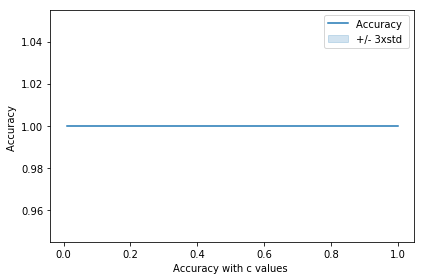

In [69]:
from sklearn.linear_model import LogisticRegression
cs = [0.01, 0.02, 0.05, 0.75, 0.1, 0.5, 0.75, 1]
accs = []
for c in cs:
    lr = LogisticRegression(C=c, solver='liblinear').fit(X_train, y_train)
    yhat = lr.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, yhat), 2)
    accs.append(acc)
    print("Test set accuracy with c =", c, "is", acc)
sns.lineplot(cs, accs)

bestc = cs[accs.index(max(accs))]
print("\nHighest accuracy is achieved with c =", bestc)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Accuracy with c values ')
plt.tight_layout()
lr = LogisticRegression(C=bestc, solver='liblinear').fit(X_train, y_train)


<h2>Geocoder</h2>

In [74]:
!pip -q install geopy

from geopy.geocoders import Nominatim # library to covert address to latitude and longitude

!pip -q install geocoder
import geocoder

<b>Get latitude and longitude for each rows of the dataframe.</b>

In [75]:
def get_latlng(arcgis_geocoder): # defining the function
    
    lat_lng_coords = None # initialising location to None
    
    while(lat_lng_coords is None): # geocode while loop to create latitude and longitude for each rows
        g = geocoder.arcgis('{}, Africa, '.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [76]:

country_code = df2['Country']
coordinates = [get_latlng(country_code) for country_code in country_code.tolist()]


In [77]:


df_loc = df2

df_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])

df_loc['Latitude'] = df_coordinates['Latitude']

df_loc['Longitude'] = df_coordinates['Longitude']

df_loc.head(38)



,Year,Country,EVD,Cases,Deaths,Case fatality,Latitude,Longitude
1,2018,Democratic Republic of the Congo,Zaire,54,33,61%,38.904080,-77.04064
2,2017,Democratic Republic of the Congo,Zaire,8,4,50%,43.108330,12.77534
3,2015,Italy,Zaire,1,0,0%,41.629880,-4.74138
4,2014,Spain,Zaire,1,0,0%,7.188100,21.09375
5,2014,UK,Zaire,1,0,0%,37.861500,-87.06115
6,2014,USA,Zaire,4,1,25%,-28.320690,27.61840
7,2014,Senegal,Zaire,1,0,0%,6.318710,5.60730
8,2014,Mali,Zaire,8,6,75%,-29.669720,31.00363
9,2014,Nigeria,Zaire,20,8,40%,40.726696,-5.85118
10,2014-2016,Sierra Leone,Zaire,14124,3956,28%,-28.951430,26.49071


<b> Drop the last two rows since the Coordinates are NaN </b>

In [78]:
# Delete row at index position 36 & 37
df22 = df_loc.drop([df_loc.index[34] , df_loc.index[35]])
df22

,Year,Country,EVD,Cases,Deaths,Case fatality,Latitude,Longitude
1,2018,Democratic Republic of the Congo,Zaire,54,33,61%,38.904080,-77.04064
2,2017,Democratic Republic of the Congo,Zaire,8,4,50%,43.108330,12.77534
3,2015,Italy,Zaire,1,0,0%,41.629880,-4.74138
4,2014,Spain,Zaire,1,0,0%,7.188100,21.09375
5,2014,UK,Zaire,1,0,0%,37.861500,-87.06115
6,2014,USA,Zaire,4,1,25%,-28.320690,27.61840
7,2014,Senegal,Zaire,1,0,0%,6.318710,5.60730
8,2014,Mali,Zaire,8,6,75%,-29.669720,31.00363
9,2014,Nigeria,Zaire,20,8,40%,40.726696,-5.85118
10,2014-2016,Sierra Leone,Zaire,14124,3956,28%,-28.951430,26.49071


<b>Importing the needed libraries</b>

In [79]:
import matplotlib.cm as cm
import matplotlib.colors as colors

import numpy as np

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans

!pip -q install folium
print('folium installed...')
import folium # library for map rendering
print('folium imported...')
print('Done')

folium installed...
folium imported...
Done


<b>Using the geopy library to get the latitude and longitude values of Africa </b>

In [80]:
address = 'Africa, '

geolocator = Nominatim(user_agent="ln_explorer")

location = geolocator.geocode(address)

latitude = location.latitude

longitude = location.longitude

print('The geographical coordinates of Africa are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Africa are 11.5024338, 17.7578122.


<b> Coming up with the map of Africa with folium </b>


In [81]:
map_africa = folium.Map(location = [latitude, longitude], zoom_start=12)

map_africa

<b> Bring together the EVD on the map</b>

In [82]:
for lat, lng, EVD, loc in zip(df22['Latitude'],
                                  df22['Longitude'], 
                                  df22['EVD'], 
                                  df22['Country']):
    label = '{} - {}'.format(loc, EVD)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='3186cc',
        fill_opacity=0.7).add_to(map_africa)

display(map_africa)

<b>Explore the neighbourhoods in the EVD containing the word 'Zaire' </b>

In [83]:
df_africa = df22

df_africa = df22[df22['EVD'].str.contains('Zaire')]

df_africa.head(12)

,Year,Country,EVD,Cases,Deaths,Case fatality,Latitude,Longitude
1,2018,Democratic Republic of the Congo,Zaire,54,33,61%,38.904080,-77.04064
2,2017,Democratic Republic of the Congo,Zaire,8,4,50%,43.108330,12.77534
3,2015,Italy,Zaire,1,0,0%,41.629880,-4.74138
4,2014,Spain,Zaire,1,0,0%,7.188100,21.09375
5,2014,UK,Zaire,1,0,0%,37.861500,-87.06115
6,2014,USA,Zaire,4,1,25%,-28.320690,27.61840
7,2014,Senegal,Zaire,1,0,0%,6.318710,5.60730
8,2014,Mali,Zaire,8,6,75%,-29.669720,31.00363
9,2014,Nigeria,Zaire,20,8,40%,40.726696,-5.85118
10,2014-2016,Sierra Leone,Zaire,14124,3956,28%,-28.951430,26.49071


<b>Identify the Foursquare credentials and ID</b>

In [84]:
CLIENT_ID = 'NEV1SHCVX1CYKBXU0OO22DMSNMRBEFT2C00HM1LXCICNKHGM' # your Foursquare ID
CLIENT_SECRET = 'TNJTVRJDTVWYJ0LJSUPHV3LHKDPGQZADLWORB2FMULAEICBC' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NEV1SHCVX1CYKBXU0OO22DMSNMRBEFT2C00HM1LXCICNKHGM
CLIENT_SECRET:TNJTVRJDTVWYJ0LJSUPHV3LHKDPGQZADLWORB2FMULAEICBC



<b>Analyse the Country of Africa in the EVD of is commonest</b>

In [85]:
df_africa.loc[2, 'Country'] # get the name of the neighbourhood

'Democratic Republic of the Congo\xa0'

<b> Print the latitude and longitude values of Democratic Republic of the Congo</B>


In [86]:

country_latitude = df_africa.loc[2, 'Latitude'] # country latitude value
country_longitude = df_africa.loc[2, 'Longitude'] # country longitude value

country_name = df_africa.loc[2, 'Country'] # country name

print('Latitude and longitude values of {} are {}, {}.'.format(country_name, 
                                                               country_latitude, 
                                                               country_longitude))


Latitude and longitude values of Democratic Republic of the Congo  are 43.10833000000008, 12.775340000000028.


<b> With Foursquare, lets get the top 20 EVD that are in Democratic Republic of the Congo within the 500 meters radius</b>

In [87]:
LIMIT = 20 # limit of 100 venues

radius = 5000 # radius of 500 meters

url = 'https://api.foursquare.com/v2/tips/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    country_latitude, 
    country_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/tips/explore?&client_id=NEV1SHCVX1CYKBXU0OO22DMSNMRBEFT2C00HM1LXCICNKHGM&client_secret=TNJTVRJDTVWYJ0LJSUPHV3LHKDPGQZADLWORB2FMULAEICBC&v=20180604&ll=43.10833000000008,12.775340000000028&radius=5000&limit=20'

<b> Apply Get Request </b>

In [88]:
results = requests.get(url).json()
results

{'meta': {'code': 400,
  'errorType': 'param_error',
  'errorDetail': 'Must provide a valid Tip ID',
  'requestId': '5e70acfe77af03001b8caef9'},
 'response': {}}

<h2>Limitation of Foursquare</h2>

Data about Ebola Virus Disease seem not to be available in the Foursquare database as yet.